## Import Libraries

In [3]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

import tensorflow
from keras import Model
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.layers import Input, Dense, Dropout, BatchNormalization, Bidirectional, LSTM, Concatenate

from keras.utils.vis_utils import plot_model
from keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau
from sklearn.metrics import confusion_matrix

## Import Data

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
with open('/content/drive/MyDrive/final_files/X_train_vision.pkl', 'rb') as f:
  X_train_vision = pickle.load(f)
with open('/content/drive/MyDrive/final_files/X_valid_vision.pkl', 'rb') as f:
  X_valid_vision = pickle.load(f)
with open('/content/drive/MyDrive/final_files/X_test_vision.pkl', 'rb') as f:
  X_test_vision = pickle.load(f)

with open('/content/drive/MyDrive/final_files/X_train_audio.pkl', 'rb') as f:
  X_train_audio = pickle.load(f)
with open('/content/drive/MyDrive/final_files/X_valid_audio.pkl', 'rb') as f:
  X_valid_audio = pickle.load(f)
with open('/content/drive/MyDrive/final_files/X_test_audio.pkl', 'rb') as f:
  X_test_audio = pickle.load(f)

with open('/content/drive/MyDrive/final_files/X_train_text.pkl', 'rb') as f:
  X_train_text = pickle.load(f)
with open('/content/drive/MyDrive/final_files/X_valid_text.pkl', 'rb') as f:
  X_valid_text = pickle.load(f)
with open('/content/drive/MyDrive/final_files/X_test_text.pkl', 'rb') as f:
  X_test_text = pickle.load(f)

In [7]:
with open('/content/drive/MyDrive/final_files/y_train_vision.pkl', 'rb') as f:
  y_train_vision = pickle.load(f)
with open('/content/drive/MyDrive/final_files/y_valid_vision.pkl', 'rb') as f:
  y_valid_vision = pickle.load(f)
with open('/content/drive/MyDrive/final_files/y_test_vision.pkl', 'rb') as f:
  y_test_vision = pickle.load(f)

with open('/content/drive/MyDrive/final_files/y_train_aduio.pkl', 'rb') as f:
  y_train_audio = pickle.load(f)
with open('/content/drive/MyDrive/final_files/y_valid_aduio.pkl', 'rb') as f:
  y_valid_audio = pickle.load(f)
with open('/content/drive/MyDrive/final_files/y_test_aduio.pkl', 'rb') as f:
  y_test_audio = pickle.load(f)

with open('/content/drive/MyDrive/final_files/y_train_text.pkl', 'rb') as f:
  y_train_text = pickle.load(f)
with open('/content/drive/MyDrive/final_files/y_valid_text.pkl', 'rb') as f:
  y_valid_text = pickle.load(f)
with open('/content/drive/MyDrive/final_files/y_test_text.pkl', 'rb') as f:
  y_test_text = pickle.load(f)

## Vision model

In [8]:
vision_model = Sequential()
vision_model.add(Dense(512, input_shape=(35,), activation="relu"))
vision_model.add(BatchNormalization())
vision_model.add(Dropout(0.5))
vision_model.add(Dense(256, activation="relu"))
vision_model.add(BatchNormalization())
vision_model.add(Dropout(0.5))
vision_model.add(Dense(128, activation="relu"))
vision_model.add(BatchNormalization())
vision_model.add(Dropout(0.5))
vision_model.add(Dense(128, activation="relu"))
vision_model.add(BatchNormalization())
vision_model.add(Dropout(0.5))
vision_model.add(Dense(2, activation='sigmoid'))
vision_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               18432     
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 batch_normalization_1 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 256)               0

In [9]:
vision_model.compile(
        loss = tensorflow.keras.losses.BinaryCrossentropy(),
        optimizer = tensorflow.keras.optimizers.Adam(lr = 1e-4),
        metrics = ['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [11]:
stopping = EarlyStopping(monitor='val_acc', patience=3, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_acc', patience = 1, verbose = 1, factor = 0.5, min_lr = 0.001) 

classifier_vision = vision_model.fit(X_train_vision, y_train_vision, batch_size = 128, 
                                 epochs = 100, shuffle=False,
                                 validation_data = (X_valid_vision, y_valid_vision), 
                                 verbose = 1,
                                 callbacks=[stopping, reduce_lr])

Epoch 1/100
128/128 [==============================] - 1s 6ms/step - loss: 0.6452 - acc: 0.6863 - val_loss: 0.5853 - val_acc: 0.7296 - lr: 1.0000e-04
Epoch 2/100
128/128 [==============================] - 1s 9ms/step - loss: 0.6384 - acc: 0.6886 - val_loss: 0.5846 - val_acc: 0.7296 - lr: 1.0000e-04
Epoch 3/100
128/128 [==============================] - 1s 6ms/step - loss: 0.6379 - acc: 0.6889 - val_loss: 0.5846 - val_acc: 0.7296 - lr: 1.0000e-04
Epoch 4/100
128/128 [==============================] - 1s 7ms/step - loss: 0.6336 - acc: 0.6928 - val_loss: 0.5844 - val_acc: 0.7296 - lr: 1.0000e-04
Epoch 4: early stopping


In [12]:
vision_model.evaluate(X_test_vision, y_test_vision, batch_size=128)

37/37 [==============================] - 0s 3ms/step - loss: 0.6004 - acc: 0.7102


[0.600409209728241, 0.7102382779121399]

## Audio model

In [16]:
audio_model = Sequential()
audio_model.add(Dense(512, input_shape=(74,), activation="relu"))
audio_model.add(BatchNormalization())
audio_model.add(Dropout(0.5))
audio_model.add(Dense(256, activation="relu"))
audio_model.add(BatchNormalization())
audio_model.add(Dropout(0.5))
audio_model.add(Dense(128, activation="relu"))
audio_model.add(BatchNormalization())
audio_model.add(Dropout(0.5))
audio_model.add(Dense(128, activation="relu"))
audio_model.add(BatchNormalization())
audio_model.add(Dropout(0.5))
audio_model.add(Dense(2, activation='sigmoid'))
audio_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 512)               38400     
                                                                 
 batch_normalization_8 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 dropout_8 (Dropout)         (None, 512)               0         
                                                                 
 dense_11 (Dense)            (None, 256)               131328    
                                                                 
 batch_normalization_9 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dropout_9 (Dropout)         (None, 256)              

In [17]:
audio_model.compile(
        loss = tensorflow.keras.losses.BinaryCrossentropy(),
        optimizer = tensorflow.keras.optimizers.Adam(lr = 1e-4),
        metrics = ['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [19]:
stopping = EarlyStopping(monitor='val_acc', patience=3, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_acc', patience = 1, verbose = 1, factor = 0.5, min_lr = 0.001) 

classifier_audio = audio_model.fit(X_train_audio, y_train_audio, batch_size = 128, 
                                 epochs = 100, shuffle=False,
                                 validation_data = (X_valid_audio, y_valid_audio), 
                                 verbose = 1,
                                 callbacks=[stopping, reduce_lr])

Epoch 1/100
128/128 [==============================] - 1s 7ms/step - loss: 0.6912 - acc: 0.6604 - val_loss: 0.6021 - val_acc: 0.7296 - lr: 1.0000e-04
Epoch 2/100
128/128 [==============================] - 1s 7ms/step - loss: 0.6786 - acc: 0.6702 - val_loss: 0.6007 - val_acc: 0.7296 - lr: 1.0000e-04
Epoch 3/100
128/128 [==============================] - 1s 7ms/step - loss: 0.6791 - acc: 0.6686 - val_loss: 0.5979 - val_acc: 0.7296 - lr: 1.0000e-04
Epoch 4/100
128/128 [==============================] - 1s 8ms/step - loss: 0.6779 - acc: 0.6725 - val_loss: 0.5960 - val_acc: 0.7296 - lr: 1.0000e-04
Epoch 4: early stopping


In [20]:
audio_model.evaluate(X_test_audio, y_test_audio, batch_size=128)

37/37 [==============================] - 0s 3ms/step - loss: 0.6095 - acc: 0.7102


[0.6094532012939453, 0.7102382779121399]

## Text model

In [21]:
text_model = Sequential()
text_model.add(Input(shape=( 50, 300)))
text_model.add(Bidirectional(LSTM(256, return_sequences=True, recurrent_dropout=0.2, dropout=0.2)))
text_model.add(Dropout(0.6))
text_model.add(LSTM(128, return_sequences=False, recurrent_dropout=0.2, dropout=0.2))
text_model.add(Dropout(0.6))
text_model.add(Dense(2, activation='sigmoid'))

In [22]:
text_model.compile(
        loss = tensorflow.keras.losses.BinaryCrossentropy(),
        optimizer = tensorflow.keras.optimizers.Adam(lr = 1e-4),
        metrics = ['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [23]:
stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', patience = 1, verbose = 1, factor = 0.5, min_lr = 0.001) 

classifier_text = text_model.fit(X_train_text, y_train_text, batch_size = 512, 
                                 epochs = 100, shuffle=False,
                                 validation_data = (X_valid_text, y_valid_text), 
                                 verbose = 1,
                                 callbacks=[stopping, reduce_lr])

Epoch 1/100
32/32 [==============================] - 26s 632ms/step - loss: 0.5995 - acc: 0.6928 - val_loss: 0.6331 - val_acc: 0.7296 - lr: 1.0000e-04
Epoch 2/100
32/32 [==============================] - 20s 613ms/step - loss: 0.6433 - acc: 0.7085 - val_loss: 0.5587 - val_acc: 0.7301 - lr: 1.0000e-04
Epoch 3/100
32/32 [==============================] - 20s 614ms/step - loss: 0.5834 - acc: 0.7106 - val_loss: 0.5499 - val_acc: 0.7322 - lr: 1.0000e-04
Epoch 4/100
32/32 [==============================] - 20s 610ms/step - loss: 0.5759 - acc: 0.7121 - val_loss: 0.5415 - val_acc: 0.7386 - lr: 1.0000e-04
Epoch 5/100
32/32 [==============================] - 21s 670ms/step - loss: 0.5596 - acc: 0.7204 - val_loss: 0.5360 - val_acc: 0.7515 - lr: 1.0000e-04
Epoch 6/100
32/32 [==============================] - 19s 609ms/step - loss: 0.5428 - acc: 0.7373 - val_loss: 0.5245 - val_acc: 0.7632 - lr: 1.0000e-04
Epoch 7/100
32/32 [==============================] - 20s 613ms/step - loss: 0.5260 - acc: 0.74

In [24]:
text_model.evaluate(X_test_text, y_test_text, batch_size=128)

37/37 [==============================] - 2s 64ms/step - loss: 0.4591 - acc: 0.7746


[0.4590587913990021, 0.7746297717094421]

## Final model

In [25]:
# Concatenate the submodels
conc_all = Concatenate(axis=-1)([vision_model.output, audio_model.output, text_model.output])
# Fourth  Hidden Layer
out = Dense(128, activation='LeakyReLU')(conc_all)
# Fifth  Hidden Layer
out = Dense(64, activation='LeakyReLU')(out)
# Third Ouput Layer
out = Dense(2, activation='sigmoid')(out)
# Wrap model
finall = Model(inputs=[vision_model.input, audio_model.input, text_model.input], outputs=out)

In [26]:
finall.compile(
        loss = tensorflow.keras.losses.BinaryCrossentropy(),
        optimizer = tensorflow.keras.optimizers.Adam(lr = 1e-4),
        metrics = ['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


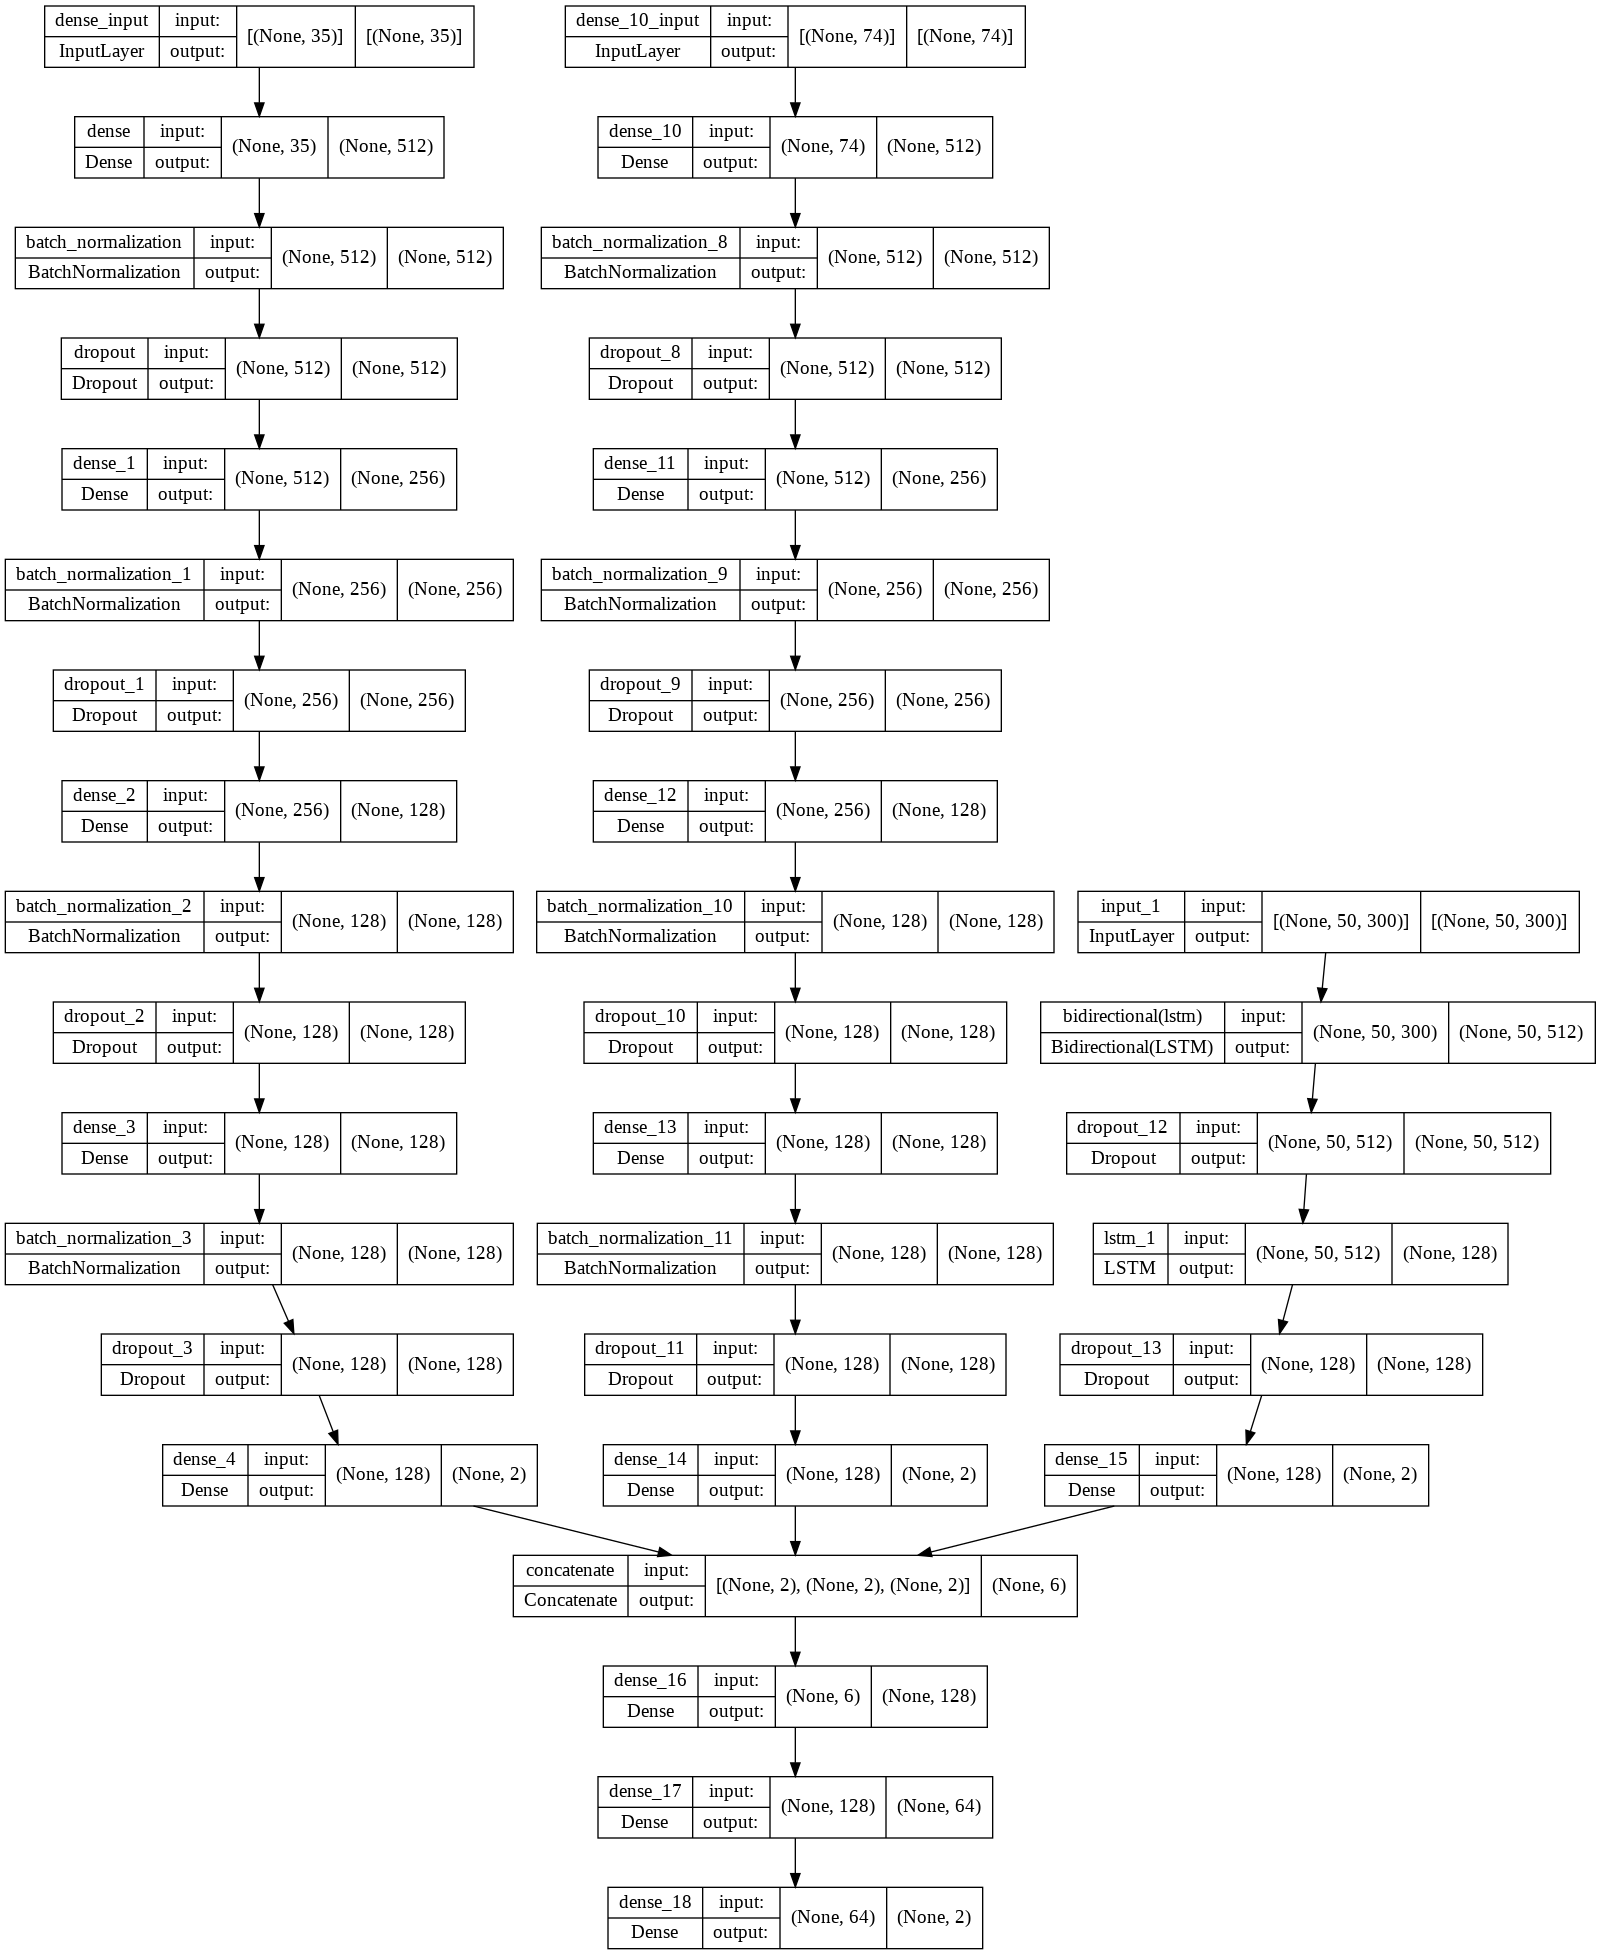

In [27]:
plot_model(finall, show_shapes=True, show_layer_names=True)

In [28]:
classifier = finall.fit([X_train_vision, X_train_audio, X_train_text], y_train_vision, batch_size = 256, epochs = 10)

Epoch 1/10
64/64 [==============================] - 49s 647ms/step - loss: 0.6171 - acc: 0.7098
Epoch 2/10
64/64 [==============================] - 40s 619ms/step - loss: 0.5485 - acc: 0.7103
Epoch 3/10
64/64 [==============================] - 40s 618ms/step - loss: 0.5077 - acc: 0.7660
Epoch 4/10
64/64 [==============================] - 40s 620ms/step - loss: 0.4753 - acc: 0.8007
Epoch 5/10
64/64 [==============================] - 39s 616ms/step - loss: 0.4537 - acc: 0.8036
Epoch 6/10
64/64 [==============================] - 40s 627ms/step - loss: 0.4377 - acc: 0.8088
Epoch 7/10
64/64 [==============================] - 39s 613ms/step - loss: 0.4273 - acc: 0.8108
Epoch 8/10
64/64 [==============================] - 39s 613ms/step - loss: 0.4233 - acc: 0.8106
Epoch 9/10
64/64 [==============================] - 41s 640ms/step - loss: 0.4145 - acc: 0.8184
Epoch 10/10
64/64 [==============================] - 39s 615ms/step - loss: 0.4109 - acc: 0.8179


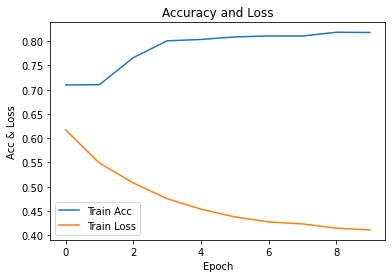

In [30]:
plt.plot(classifier.history['acc'])
plt.plot(classifier.history['loss'])
plt.title('Accuracy and Loss')
plt.ylabel('Acc & Loss')
plt.xlabel('Epoch')
plt.legend(['Train Acc', 'Train Loss'])
plt.show()